Um programa em Python que analisa o Dataset “Spotify Top 200 Charts (2020-2021)”, que engloba todas as músicas que estiveram no Top 200 Weekly (Global) charts do Spotify em 2020 e 2021. Utilizando um comitê de classificadores, o programa estima a popularidade das músicas. Para isso, emprega algoritmos de aprendizado de máquina como KNN (K-Nearest Neighbors), Naive Bayes e SVM (Support Vector Machine).

#Imports


In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import Normalizer
# remover warnings
import warnings
warnings.filterwarnings("ignore")

# Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving spotify_dataset.csv to spotify_dataset.csv


In [ ]:
s1 = pd.read_csv('spotify_dataset.csv')

In [ ]:
s1.drop(['Index', 'Week of Highest Charting', 'Song Name', 'Artist', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted', 'Tempo', 'Duration (ms)',
'Valence', 'Chord', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Liveness'],axis=1,inplace=True)

In [ ]:
s1.columns

Index(['Highest Charting Position', 'Number of Times Charted', 'Streams',
       'Artist Followers', 'Popularity', 'Danceability'],
      dtype='object')

In [ ]:
s1.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Streams                       object
Artist Followers             float64
Popularity                   float64
Danceability                 float64
dtype: object

In [ ]:
s1.shape

(1556, 6)

In [ ]:
s1.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability
0,1,8,"48,633,449",3377762.0,100.0,714.0
1,2,3,"47,248,719",2230022.0,99.0,591.0
2,1,11,"40,162,559",6266514.0,99.0,563.0
3,3,5,"37,799,456",83293380.0,98.0,808.0
4,5,1,"33,948,454",5473565.0,96.0,736.0


In [ ]:
s1.describe()

,Highest Charting Position,Number of Times Charted,Artist Followers,Popularity,Danceability
count,1556.000000,1556.000000,1.545000e+03,1545.000000,1545.000000
mean,87.744216,10.668380,1.471690e+07,70.089320,623.817055
std,58.147225,16.360546,1.667579e+07,15.824034,244.317507
min,1.000000,1.000000,4.883000e+03,0.000000,0.150000
25%,37.000000,1.000000,2.123734e+06,65.000000,556.000000
50%,80.000000,4.000000,6.852509e+06,73.000000,687.000000
75%,137.000000,12.000000,2.269875e+07,80.000000,786.000000
max,200.000000,142.000000,8.333778e+07,100.000000,965.000000


# Normalizando Dados

In [ ]:
s1.isnull().sum()

Highest Charting Position     0
Number of Times Charted       0
Streams                       0
Artist Followers             11
Popularity                   11
Danceability                 11
dtype: int64

In [ ]:
s2 = s1.dropna()

In [ ]:
s2.isnull().sum()

Highest Charting Position    0
Number of Times Charted      0
Streams                      0
Artist Followers             0
Popularity                   0
Danceability                 0
dtype: int64

In [ ]:
s2.shape

(1545, 6)

In [ ]:
s2.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability
0,1,8,"48,633,449",3377762.0,100.0,714.0
1,2,3,"47,248,719",2230022.0,99.0,591.0
2,1,11,"40,162,559",6266514.0,99.0,563.0
3,3,5,"37,799,456",83293380.0,98.0,808.0
4,5,1,"33,948,454",5473565.0,96.0,736.0


In [ ]:
s2.dtypes

Highest Charting Position      int64
Number of Times Charted        int64
Streams                       object
Artist Followers             float64
Popularity                   float64
Danceability                 float64
dtype: object

In [ ]:
num = []
for x in s2['Streams']:
  num.append(int(x.replace(",","")))
streams = pd.DataFrame(num)
streams = streams.rename(columns = {0 : 'Streams'})
print(streams)

       Streams
0     48633449
1     47248719
2     40162559
3     37799456
4     33948454
...        ...
1540   4630675
1541   4623030
1542   4620876
1543   4607385
1544   4595450

[1545 rows x 1 columns]


In [ ]:
pop = []
for x in s2['Popularity']:
  if(x <= 49):
    x = 0
  elif(x <= 84):
    x = 1
  else:
    x = 2
  pop.append(x)
popular = pd.DataFrame(pop)
popular = popular.rename(columns = {0 : 'Popularity'})
print(popular)

      Popularity
0              2
1              2
2              2
3              2
4              2
...          ...
1540           1
1541           1
1542           1
1543           1
1544           1

[1545 rows x 1 columns]


In [ ]:
dance = []
for x in s2['Danceability']:
  if (x > 1):
    x = x/1000
  dance.append(x)
danca = pd.DataFrame(dance)
danca = danca.rename(columns = {0 : 'Danceability'})
print(danca)

      Danceability
0            0.714
1            0.591
2            0.563
3            0.808
4            0.736
...            ...
1540         0.762
1541         0.528
1542         0.765
1543         0.832
1544         0.448

[1545 rows x 1 columns]


In [ ]:
s2.drop(['Streams', 'Popularity', 'Danceability'], axis = 1, inplace = True)

In [ ]:
s2 = pd.concat([s2,streams], axis = 1)
s2 = pd.concat([s2,popular], axis = 1)
s2 = pd.concat([s2,danca], axis = 1)

In [ ]:
s2.columns

Index(['Highest Charting Position', 'Number of Times Charted',
       'Artist Followers', 'Streams', 'Popularity', 'Danceability'],
      dtype='object')

In [ ]:
s2.head()

,Highest Charting Position,Number of Times Charted,Artist Followers,Streams,Popularity,Danceability
0,1.0,8.0,3377762.0,48633449.0,2.0,0.714
1,2.0,3.0,2230022.0,47248719.0,2.0,0.591
2,1.0,11.0,6266514.0,40162559.0,2.0,0.563
3,3.0,5.0,83293380.0,37799456.0,2.0,0.808
4,5.0,1.0,5473565.0,33948454.0,2.0,0.736


In [ ]:
s2.dtypes

Highest Charting Position    float64
Number of Times Charted      float64
Artist Followers             float64
Streams                      float64
Popularity                   float64
Danceability                 float64
dtype: object

In [ ]:
s2.describe()

,Highest Charting Position,Number of Times Charted,Artist Followers,Streams,Popularity,Danceability
count,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1545.000000,1545.000000
mean,87.825243,10.684142,1.471690e+07,6.337136e+06,1.025243,0.689997
std,58.132046,16.389761,1.667579e+07,3.375402e+06,0.375768,0.142444
min,1.000000,1.000000,4.883000e+03,4.176083e+06,0.000000,0.150000
25%,37.000000,1.000000,2.123734e+06,4.915080e+06,1.000000,0.599000
50%,80.000000,4.000000,6.852509e+06,5.269163e+06,1.000000,0.707000
75%,137.000000,12.000000,2.269875e+07,6.452492e+06,1.000000,0.796000
max,200.000000,142.000000,8.333778e+07,4.863345e+07,2.000000,0.980000


In [ ]:
s2 = s2.dropna()

#Dummy Classifier


In [ ]:
#Definindo variáveis preditoras(x) e a variável target(y)
x = s2[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Streams', 'Danceability']]
y = s2['Popularity']

#Definindo uma seed
SEED = 10
np.random.seed(SEED)

#Facilitando a criacao de variaveis pra teste e treino
treino_x, teste_x, treino_y, teste_y = train_test_split (x, y, random_state = SEED, stratify = y, test_size= 0.25)
print("Treinaremos com %d elementos e testaremos com %d elementos." % (len(treino_x), (len(teste_x))))


Treinaremos com 1150 elementos e testaremos com 384 elementos.


In [ ]:
#Aqui usaremos o classificador Dummy para nossa base line, devemos usar algum classificador que alcance uma acurácia maior que essa
dummy_mostfrequent = DummyClassifier(strategy='most_frequent')
dummy_mostfrequent.fit(treino_x, treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y) * 100
print("A acurácia do dummy most frequent foi %.2f%%" % acuracia)

A acurácia do dummy most frequent foi 85.94%


# Árvore de Decisão

In [ ]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
var_ind = s2[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Streams', 'Danceability']]
target = s2['Popularity']

SEED = 15
np.random.seed(SEED)

X_train, X_test, y_train, y_test = train_test_split(var_ind, target, random_state = SEED, test_size=0.25)

In [ ]:
modArv = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
modArv = modArv.fit(X_train, y_train)
predictions = modArv.predict(X_test)
print("Treinaremos com %d elementos e testaremos com %d elementos." % (len(X_train), (len(X_test))))
acuracia = accuracy_score(y_test, predictions) * 100
print("A acuracia da nossa árvore de decisão foi %.2f%%" % acuracia)

Treinaremos com 1150 elementos e testaremos com 384 elementos.
A acuracia da nossa árvore de decisão foi 88.28%


In [ ]:
print("\nMatriz de confusão detalhada da Árvore de Decisão:\n",
pd.crosstab(y_test, predictions, rownames=['Real'], colnames=
['Predito'],
margins=True, margins_name='Todos'))


Matriz de confusão detalhada da Árvore de Decisão:
 Predito  1.0  2.0  Todos
Real                    
0.0       20    0     20
1.0      332    3    335
2.0       22    7     29
Todos    374   10    384


In [ ]:
import sklearn.metrics as metrics
print("Relatório sobre a qualidade:\n")
print(metrics.classification_report(y_test, predictions,target_names=['Baixa', 'Média', 'Alta']))

Relatório sobre a qualidade:

              precision    recall  f1-score   support

       Baixa       0.00      0.00      0.00        20
       Média       0.89      0.99      0.94       335
        Alta       0.70      0.24      0.36        29

    accuracy                           0.88       384
   macro avg       0.53      0.41      0.43       384
weighted avg       0.83      0.88      0.84       384



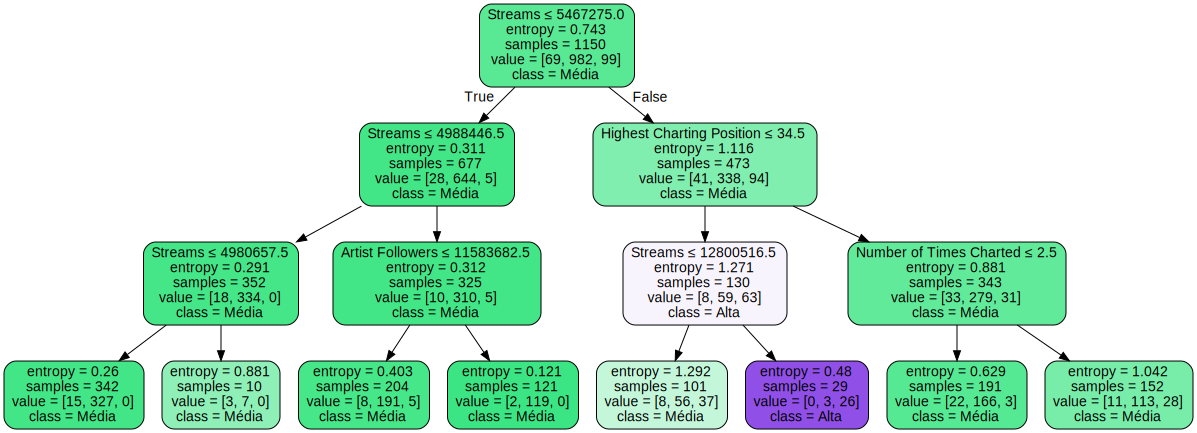

In [ ]:
import graphviz
dot_data = tree.export_graphviz(modArv, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("s2")
dot_data = tree.export_graphviz(modArv, out_file=None,
feature_names=('Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Streams', 'Danceability'),
class_names=('Baixa', 'Média', 'Alta', 'Muito Alta'),
filled=True, rounded=True,
special_characters=True)
graph = graphviz.Source(dot_data, format="png")
graph

#Classificador KNN

In [ ]:
X = s2[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Streams', 'Danceability']]
y = s2['Popularity']
(X_train, X_test, y_train, y_test) = train_test_split(X,y)
modKnn = KNeighborsClassifier()
modKnn.fit(X_train,y_train)
precisao = str(round(modKnn.score(X_test,y_test) * 100, 2))+"%"
print("A acurácia do modelo k-NN foi",precisao)
y_pred = modKnn.predict(X_test)
print("Relatório sobre a qualidade:\n")
print(classification_report(y_test, y_pred))

A acurácia do modelo k-NN foi 84.9%
Relatório sobre a qualidade:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        21
         1.0       0.88      0.96      0.92       334
         2.0       0.36      0.17      0.23        29

    accuracy                           0.85       384
   macro avg       0.41      0.38      0.38       384
weighted avg       0.79      0.85      0.82       384



In [ ]:
print("\nMatriz de confusão detalhada do KNN:\n",
pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=
['Predito'],
margins=True, margins_name='Todos'))


Matriz de confusão detalhada do KNN:
 Predito  0.0  1.0  2.0  Todos
Real                         
0.0        0   21    0     21
1.0        4  321    9    334
2.0        0   24    5     29
Todos      4  366   14    384


In [ ]:
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)
scores = []
for i in range(2000):
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  model = KNeighborsClassifier()
  model.fit(X_train,y_train)
  precisao = model.score(X_test,y_test)
  scores.append(precisao)

print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

Média: 84.24%
Desvio padrão: 1.59%


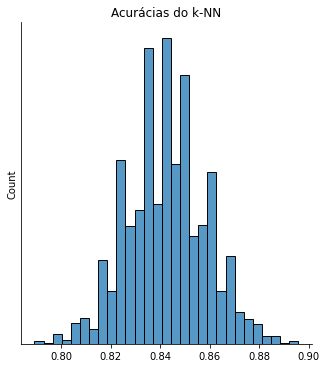

In [ ]:
sns.displot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()

#Classificador Naive Bayes



In [ ]:
X = s2[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Streams', 'Danceability']]
y = s2['Popularity']
(X_train, X_test, y_train, y_test) = train_test_split(X,y)

In [ ]:
modNaive = GaussianNB()
modNaive.fit(X_train,y_train)
precisao1 = str(round(modNaive.score(X_test,y_test) * 100, 2))+"%"
print("A acurácia do modelo Naive Bayes foi",precisao1)
y_pred = modNaive.predict(X_test)
print("Relatório sobre a qualidade:\n")
print(classification_report(y_test, y_pred))

A acurácia do modelo Naive Bayes foi 85.42%
Relatório sobre a qualidade:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        21
         1.0       0.87      0.98      0.92       329
         2.0       0.44      0.21      0.28        34

    accuracy                           0.85       384
   macro avg       0.44      0.39      0.40       384
weighted avg       0.79      0.85      0.81       384



In [ ]:
print("\nMatriz de confusão detalhada do Naive Bayes:\n",
pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=
['Predito'],
margins=True, margins_name='Todos'))


Matriz de confusão detalhada do Naive Bayes:
 Predito  1.0  2.0  Todos
Real                    
0.0       20    1     21
1.0      321    8    329
2.0       27    7     34
Todos    368   16    384


In [ ]:
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)
scores = []
for i in range(2000):
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  model = GaussianNB()
  model.fit(X_train,y_train)
  precisao = model.score(X_test,y_test)
  scores.append(precisao)

print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

Média: 85.82%
Desvio padrão: 1.54%


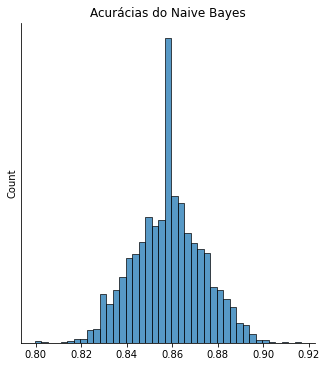

In [ ]:
sns.displot(scores)
plt.yticks([])
plt.title("Acurácias do Naive Bayes")
plt.show()

#Classificador SVM

In [ ]:
X = s2[['Highest Charting Position', 'Number of Times Charted', 'Artist Followers', 'Streams', 'Danceability']]
y = s2['Popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
modSVM = svm.SVC()
modSVM.fit(X_train, y_train)
precisao = str(round(modSVM.score(X_test,y_test) * 100, 2))+"%"
print("A acurácia do modelo SVM foi",precisao)
y_pred = modSVM.predict(X_test)
print("Relatório sobre a qualidade:\n")
print(classification_report(y_test, y_pred))

A acurácia do modelo SVM foi 86.46%
Relatório sobre a qualidade:

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        21
         1.0       0.86      1.00      0.93       328
         2.0       1.00      0.11      0.21        35

    accuracy                           0.86       384
   macro avg       0.62      0.37      0.38       384
weighted avg       0.83      0.86      0.81       384



In [ ]:
print("\nMatriz de confusão detalhada do SVM:\n",
pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=
['Predito'],
margins=True, margins_name='Todos'))


Matriz de confusão detalhada do SVM:
 Predito  1.0  2.0  Todos
Real                    
0.0       21    0     21
1.0      328    0    328
2.0       31    4     35
Todos    380    4    384


In [ ]:
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)
scores = []
for i in range(2000):
  X_train, X_test, y_train, y_test = train_test_split(X,y)
  model = svm.SVC()
  model.fit(X_train,y_train)
  precisao = model.score(X_test,y_test)
  scores.append(precisao)

print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

Média: 85.87%
Desvio padrão: 1.57%


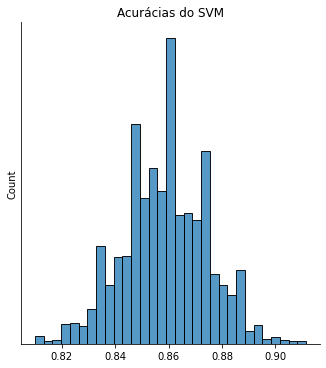

In [ ]:
sns.displot(scores)
plt.yticks([])
plt.title("Acurácias do SVM")
plt.show()

# Comitê de Classificadores

In [ ]:
tot_baixa = 0
tot_media = 0
tot_alta = 0


pred_knn = (modKnn.predict([[158.0, 1.0, 3071170.0, 4569978.0, 0.681]]))
if pred_knn == 0 :
  tot_baixa = tot_baixa + 1
elif pred_knn == 1 :
  tot_media = tot_media + 1
else:
  tot_alta = tot_alta + 1
print("O kNN classificou como:" ,pred_knn)

pred_naive = (modNaive.predict([[158.0, 1.0, 3071170.0, 4569978.0, 0.681]]))
if pred_naive == 0 :
  tot_baixa = tot_baixa + 1
elif pred_naive == 1 :
  tot_media = tot_media + 1
else:
  tot_alta = tot_alta + 1
print("O Naive Bayes classificou como:" ,pred_naive)

pred_svm = (modSVM.predict([[158.0, 1.0, 3071170.0, 4569978.0, 0.681]]))
if pred_svm == 0 :
  tot_baixa = tot_baixa + 1
elif pred_svm == 1 :
  tot_media = tot_media + 1
else:
  tot_alta = tot_alta + 1
print("O SVM classificou como:" ,pred_svm, "\n")

if tot_baixa >= 2:
  print("O comitê acredita que a popularidade é baixa.")
elif tot_media >= 2:
  print("O comitê acredita que a popularidade é média.")
else:
  print("O comitê acredita que a popularidade é alta.")

if tot_baixa == 3 or tot_media == 3 or tot_alta == 3:
  print("O comitê é unânime em sua opinião.")

O kNN classificou como: [1.]
O Naive Bayes classificou como: [1.]
O SVM classificou como: [1.] 

O comitê acredita que a popularidade é média.
O comitê é unânime em sua opinião.
